In [1]:
import os

try:
    os.chdir('/Users/cha/Desktop/공모전/SWING 2023 교육&해커톤/Project/data')
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")

Directory changed


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timedelta

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
import platform
if platform.system() == 'Darwin': 
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': 
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
os.getcwd()

'/Users/cha/Desktop/공모전/SWING 2023 교육&해커톤/Project/data'

# Data Load

In [6]:
dirs = os.getcwd() + '/시간대별이용정보/'
files = os.listdir(dirs)
files

['서울특별시 공공자전거 이용정보(시간대별)_22.09.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.08.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.06.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.12.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.07.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.11.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.05.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.04.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.10.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.01.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.03.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.02.csv']

In [7]:
try:
    data = pd.read_pickle('data/dataframes/2022.csv')
except:
    data = pd.DataFrame()

    total = len(files)
    for i, file in enumerate(files, 1):
        print("%d/%d loaded..." %(i, total))

        formatter = file.split('.')[1]

        _data = pd.read_csv(dirs + file,encoding='cp949')
        data = pd.concat([data, _data])

1/12 loaded...
2/12 loaded...
3/12 loaded...
4/12 loaded...
5/12 loaded...
6/12 loaded...
7/12 loaded...
8/12 loaded...
9/12 loaded...
10/12 loaded...
11/12 loaded...
12/12 loaded...


In [8]:
data

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-09-01,0,1665,1665. 양지근린공원앞,정기권,NaN,~10대,1,18.79,0.17,730.00,3
1,2022-09-01,0,1669,1669. 중계역 3번출구,정기권,NaN,~10대,1,36.41,0.40,1735.03,11
2,2022-09-01,0,1165,1165. 마곡중학교 후문,정기권,NaN,~10대,1,0.00,0.00,0.00,1
3,2022-09-01,0,764,764. 목동청소년수련관,정기권,NaN,~10대,1,27.95,0.22,941.14,6
4,2022-09-01,0,3533,3533. 건대입구역 사거리(롯데백화점),정기권,NaN,~10대,1,61.05,0.55,2371.67,20
...,...,...,...,...,...,...,...,...,...,...,...,...
1271371,2022-02-28,23,1019,1019. 다성이즈빌아파트(호원대 대각선 맞은편),정기권,M,기타,1,39.46,0.29,1245.50,7
1271372,2022-02-28,23,226,226. 샛강역 1번출구 앞,정기권,M,기타,1,32.30,0.29,1254.67,14
1271373,2022-02-28,23,2145,2145. 은천초등학교 육교,정기권,M,기타,1,0.00,0.00,0.00,9
1271374,2022-02-28,23,1509,1509. 서울북부수도사업소,정기권,M,기타,1,0.00,0.00,0.00,4


-> 36,160,487 데이터 (2022년 공공자전거 이용건수)

In [9]:
df = data.copy()

# Preprocessing

날짜 데이터 datetime 형식으로 설정 후 요일 컬럼 생성

In [10]:
df['대여일자'] = pd.to_datetime(df['대여일자'], format='%Y-%m-%d')
df['요일'] = df['대여일자'].dt.day_name()

In [11]:
df = df.sort_values(by='대여일자' ,ascending=True)

## 이상 데이터 (0인 데이터) 제거

In [12]:
print('이동거리가 0이거나 이용시간이 0인 데이터:', len(df[(df['이동거리(M)']==0) | (df['이용시간(분)']==0)]))
print('이동거리가 0인 데이터:', len(df[df['이동거리(M)']==0]))
print('이용시간이 0인 데이터:', len(df[df['이용시간(분)']==0]))

이동거리가 0이거나 이용시간이 0인 데이터: 1423513
이동거리가 0인 데이터: 1415214
이용시간이 0인 데이터: 17416


이동거리가 0이거나 이용시간이 0인 데이터 1,423,513개 제거

In [13]:
df = df[(df['이동거리(M)']!=0) | (df['이용시간(분)']!=0)]
df.reset_index(inplace=True)
df = df.drop('index', axis=1)

df

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일
0,2022-01-01,18,1955,1955. 디지털입구 교차로,일일권,M,20대,1,0.00,0.00,0.00,10,Saturday
1,2022-01-01,17,1113,1113. 서남환경공원 버스정류장,정기권,M,기타,1,72.34,0.65,2810.35,20,Saturday
2,2022-01-01,17,1020,1020. 강동경찰서,정기권,M,기타,1,30.85,0.19,820.00,6,Saturday
3,2022-01-01,17,816,816. 신용산역 6번출구 앞,정기권,M,기타,1,124.13,1.12,4822.50,29,Saturday
4,2022-01-01,17,262,262. 영문초등학교 사거리,정기권,M,기타,1,240.93,2.17,9360.00,50,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36151365,2022-12-31,12,1767,1767.방학초등학교 앞,정기권,NaN,30대,1,38.59,0.39,1680.00,13,Saturday
36151366,2022-12-31,12,1554,1554.번동사거리,정기권,NaN,30대,1,28.16,0.20,846.55,4,Saturday
36151367,2022-12-31,12,497,497.합정동주민센터 앞,정기권,NaN,30대,1,26.64,0.24,1035.15,11,Saturday
36151368,2022-12-31,12,2739,2739.수명산파크1단지교차로,정기권,NaN,30대,1,35.27,0.34,1460.00,10,Saturday


In [14]:
df.replace('\\N', np.nan, inplace=True)

In [15]:
df.isnull().sum()

대여일자              0
대여시간              0
대여소번호             0
대여소명              0
대여구분코드            0
성별         12311774
연령대코드             0
이용건수              0
운동량          137392
탄소량          137392
이동거리(M)           0
이용시간(분)           0
요일                0
dtype: int64

-> 탄소량이 결측치인 데이터 제거

In [16]:
df['탄소량'] = df['탄소량'].astype('float')
df = df.dropna(subset=['탄소량'])

'대여구분코드'가 '단체권'일 경우 탄소량이나 다른 데이터에 영향을 줄 수 있기 때문에 제거 (191,496개 데이터 제거)

In [17]:
df = df[df['대여구분코드']!='단체권']

In [18]:
df

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일
0,2022-01-01,18,1955,1955. 디지털입구 교차로,일일권,M,20대,1,0.00,0.00,0.00,10,Saturday
1,2022-01-01,17,1113,1113. 서남환경공원 버스정류장,정기권,M,기타,1,72.34,0.65,2810.35,20,Saturday
2,2022-01-01,17,1020,1020. 강동경찰서,정기권,M,기타,1,30.85,0.19,820.00,6,Saturday
3,2022-01-01,17,816,816. 신용산역 6번출구 앞,정기권,M,기타,1,124.13,1.12,4822.50,29,Saturday
4,2022-01-01,17,262,262. 영문초등학교 사거리,정기권,M,기타,1,240.93,2.17,9360.00,50,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36151365,2022-12-31,12,1767,1767.방학초등학교 앞,정기권,NaN,30대,1,38.59,0.39,1680.00,13,Saturday
36151366,2022-12-31,12,1554,1554.번동사거리,정기권,NaN,30대,1,28.16,0.20,846.55,4,Saturday
36151367,2022-12-31,12,497,497.합정동주민센터 앞,정기권,NaN,30대,1,26.64,0.24,1035.15,11,Saturday
36151368,2022-12-31,12,2739,2739.수명산파크1단지교차로,정기권,NaN,30대,1,35.27,0.34,1460.00,10,Saturday


필요없는 컬럼 제거

In [19]:
df = df.drop(['대여소번호', '대여소명', '성별', '연령대코드', '이용건수', '운동량'], axis=1)
df.reset_index(inplace=True)
df = df.drop('index', axis=1)
df

,대여일자,대여시간,대여구분코드,탄소량,이동거리(M),이용시간(분),요일
0,2022-01-01,18,일일권,0.00,0.00,10,Saturday
1,2022-01-01,17,정기권,0.65,2810.35,20,Saturday
2,2022-01-01,17,정기권,0.19,820.00,6,Saturday
3,2022-01-01,17,정기권,1.12,4822.50,29,Saturday
4,2022-01-01,17,정기권,2.17,9360.00,50,Saturday
...,...,...,...,...,...,...,...
35822477,2022-12-31,12,정기권,0.39,1680.00,13,Saturday
35822478,2022-12-31,12,정기권,0.20,846.55,4,Saturday
35822479,2022-12-31,12,정기권,0.24,1035.15,11,Saturday
35822480,2022-12-31,12,정기권,0.34,1460.00,10,Saturday


In [20]:
df.rename(columns={'대여일자':'Date', '대여시간':'Rental Time', '대여구분코드': 'Rental Code', '탄소량':'Carbon(g)', '이동거리(M)':'Distance(m)', '이용시간(분)':'Using Time(M)', '요일':'Day'}, inplace=True)

In [21]:
df = df[['Date', 'Day', 'Rental Time', 'Rental Code', 'Carbon(g)', 'Distance(m)', 'Using Time(M)']]
df

,Date,Day,Rental Time,Rental Code,Carbon(g),Distance(m),Using Time(M)
0,2022-01-01,Saturday,18,일일권,0.00,0.00,10
1,2022-01-01,Saturday,17,정기권,0.65,2810.35,20
2,2022-01-01,Saturday,17,정기권,0.19,820.00,6
3,2022-01-01,Saturday,17,정기권,1.12,4822.50,29
4,2022-01-01,Saturday,17,정기권,2.17,9360.00,50
...,...,...,...,...,...,...,...
35822477,2022-12-31,Saturday,12,정기권,0.39,1680.00,13
35822478,2022-12-31,Saturday,12,정기권,0.20,846.55,4
35822479,2022-12-31,Saturday,12,정기권,0.24,1035.15,11
35822480,2022-12-31,Saturday,12,정기권,0.34,1460.00,10


Rental Code 값 영어로 변경

In [23]:
df['Rental Code'].value_counts()

정기권         29039485
일일권          6458607
일일권(비회원)      324390
Name: Rental Code, dtype: int64

In [24]:
df['Rental Code'] = df['Rental Code'].replace('정기권', 'Monthly Pass')
df['Rental Code'] = df['Rental Code'].replace('일일권', 'Daily Pass')
df['Rental Code'] = df['Rental Code'].replace('일일권(비회원)', 'Daily Pass(Non-member)')

In [25]:
df

,Date,Day,Rental Time,Rental Code,Carbon(g),Distance(m),Using Time(M)
0,2022-01-01,Saturday,18,Daily Pass,0.00,0.00,10
1,2022-01-01,Saturday,17,Monthly Pass,0.65,2810.35,20
2,2022-01-01,Saturday,17,Monthly Pass,0.19,820.00,6
3,2022-01-01,Saturday,17,Monthly Pass,1.12,4822.50,29
4,2022-01-01,Saturday,17,Monthly Pass,2.17,9360.00,50
...,...,...,...,...,...,...,...
35822477,2022-12-31,Saturday,12,Monthly Pass,0.39,1680.00,13
35822478,2022-12-31,Saturday,12,Monthly Pass,0.20,846.55,4
35822479,2022-12-31,Saturday,12,Monthly Pass,0.24,1035.15,11
35822480,2022-12-31,Saturday,12,Monthly Pass,0.34,1460.00,10


# 평일 시간별 이용자 분포

In [26]:
weekday = df[(df['Day']!='Saturday') & (df['Day']!='Sunday')]

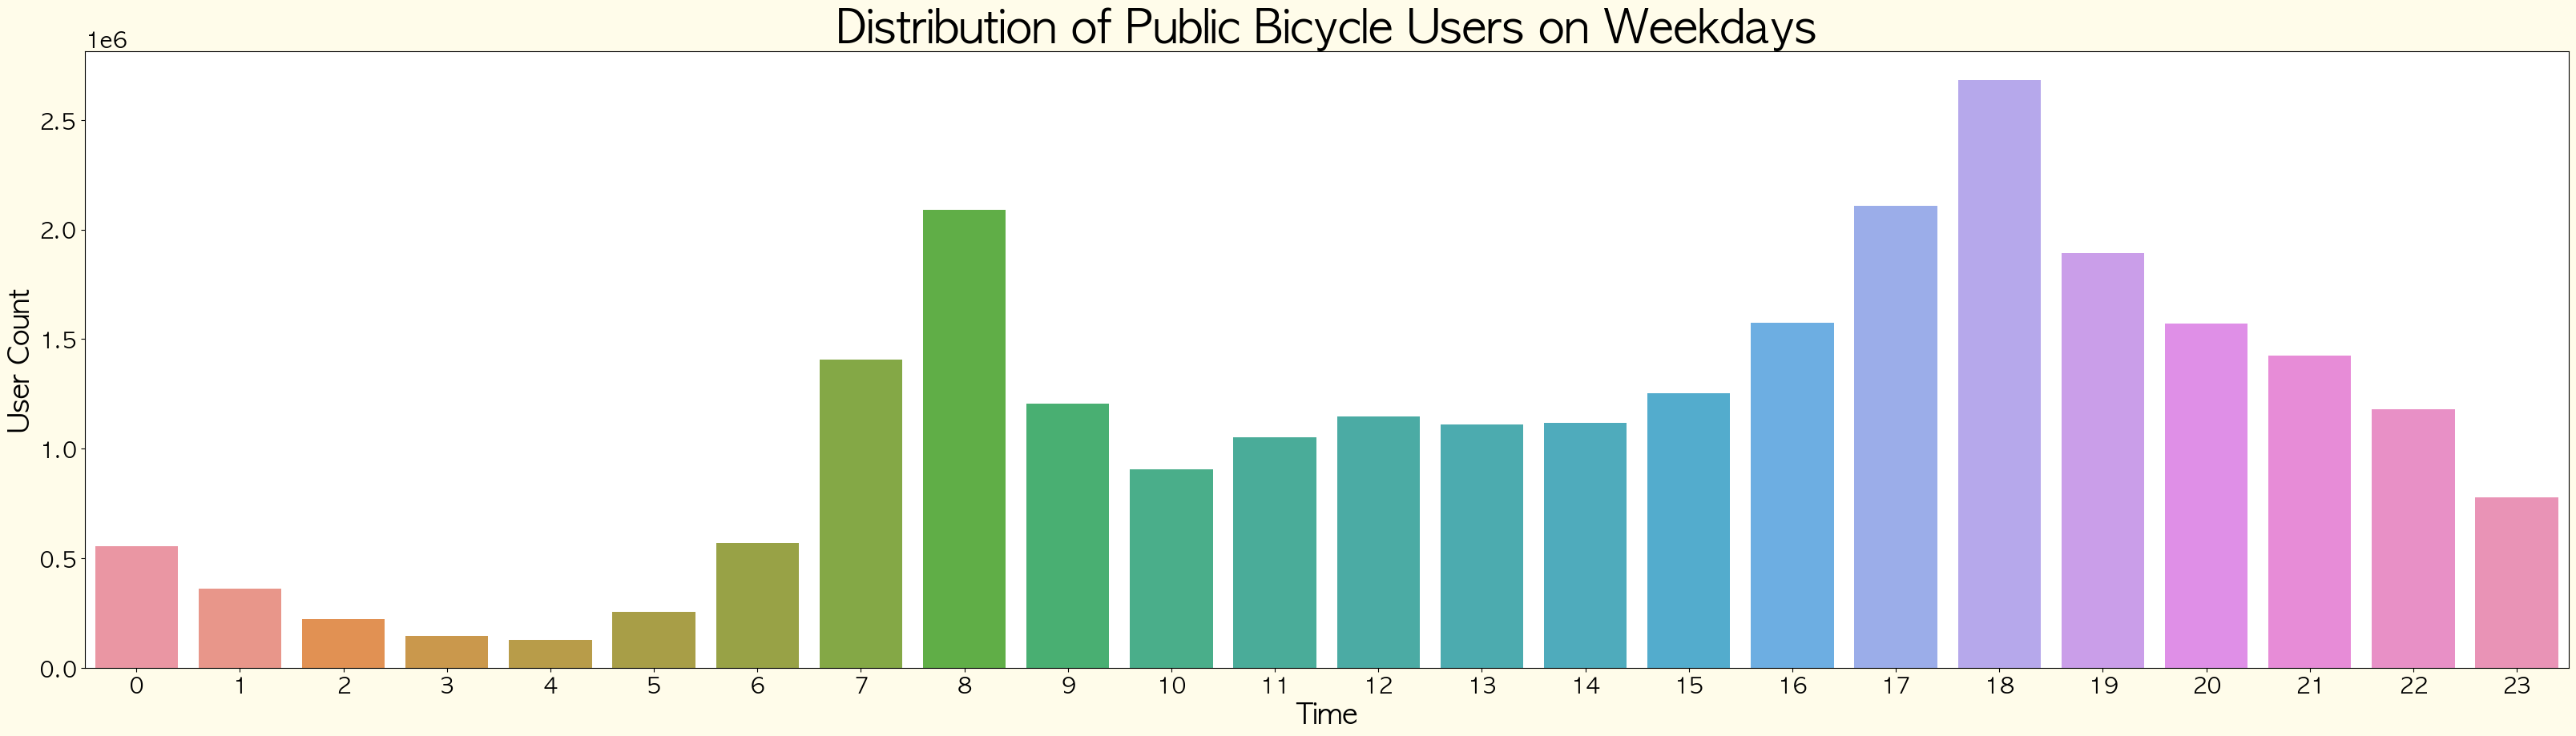

In [89]:
import matplotlib.colors as mcolors
import random

a = weekday['Rental Time'].value_counts()

fig, ax1 = plt.subplots(figsize=(40, 10), facecolor='#FFFCEA')

# plt.bar(a.index, a, color=color_palette)
sns.barplot(x=a.index, y=a) # 색깔 잘 되려면..

# 그래프 제목과 축 레이블 설정
plt.xlabel('Time', fontdict={'fontsize':25})
plt.ylabel('User Count', fontdict={'fontsize':25})

plt.xticks(a.index[::1], a.index[::1], fontsize=20)
plt.yticks(fontsize=20)
plt.title('Distribution of Public Bicycle Users on Weekdays', fontdict = {'fontsize' : 40, 'fontweight': 'bold'})
plt.rcParams['font.size'] = 20

plt.show()

In [31]:
len(weekday)

26736174

In [33]:
commuting = weekday[(weekday['Rental Time']==8) | (weekday['Rental Time']==18)]
len(commuting)

4771439

In [34]:
len(commuting)/len(weekday)*100

17.846379216412938

# 탄소 세이브량

In [30]:
df['Carbon(g)'].sum()

24048788.11999997

# 대여권 정보

In [36]:
df['Rental Code'].value_counts()

Monthly Pass              29039485
Daily Pass                 6458607
Daily Pass(Non-member)      324390
Name: Rental Code, dtype: int64

In [43]:
df['Rental Code'].unique()

array(['Daily Pass', 'Monthly Pass', 'Daily Pass(Non-member)'],
      dtype=object)

In [37]:
commuting = df[(df['Day']!='Saturday') & (df['Day']!='Sunday')&((df['Rental Time']==8) | (df['Rental Time']==18))]

In [40]:
commuting['Rental Code'].value_counts()

Monthly Pass              4201774
Daily Pass                 546341
Daily Pass(Non-member)      23324
Name: Rental Code, dtype: int64

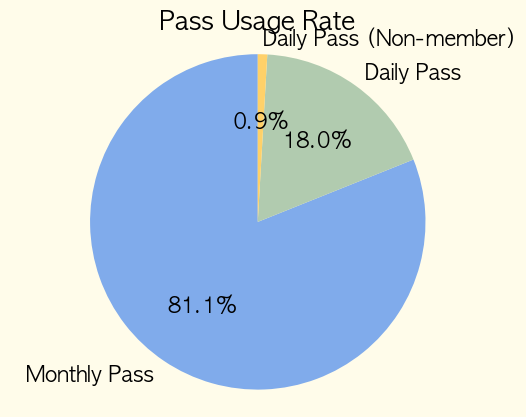

In [79]:
plt.figure(facecolor='#FFFCEA')
labels = ['Monthly Pass', 'Daily Pass', 'Daily Pass (Non-member)']
sizes = df['Rental Code'].value_counts()
colors = ['#80ABEB','#B1CBAF', '#FFD169']


plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15})

plt.axis('equal')


# plt.gca().set_facecolor('none')
plt.title('Pass Usage Rate', fontdict = {'fontsize' : 18})

plt.show()


In [ ]:
plt.savefig('myfigure.pdf', transparent = True)

In [46]:
labels

array(['Daily Pass', 'Monthly Pass', 'Daily Pass(Non-member)'],
      dtype=object)

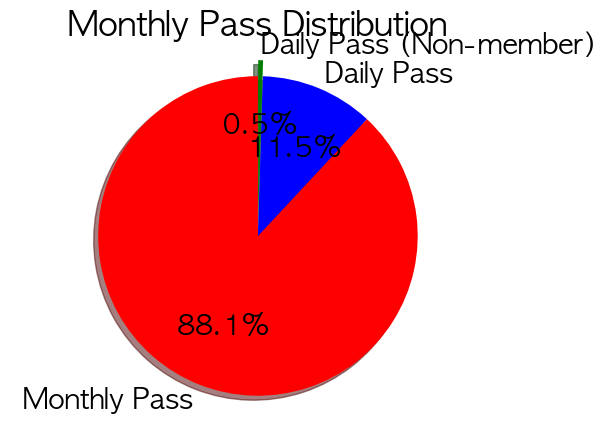

In [87]:
labels = ['Monthly Pass', 'Daily Pass', 'Daily Pass (Non-member)']
sizes = commuting['Rental Code'].value_counts()
colors = ['red', 'blue', 'green']
explode = (0, 0, 0.1)  # 부채꼴이 돌출되는 정도

# 파이 차트 그리기
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

# 원 모양으로 설정
plt.axis('equal')

# 차트 제목 추가
plt.title('Monthly Pass Distribution')

# 차트 표시
plt.show()


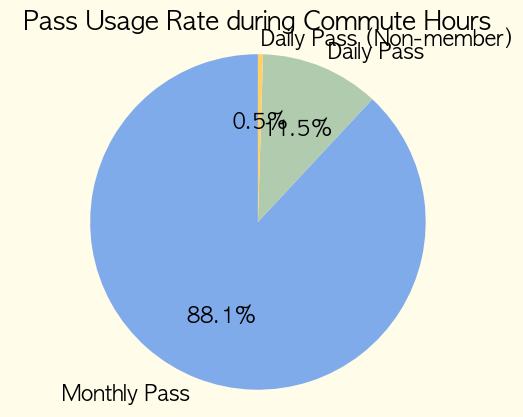

In [88]:
plt.figure(facecolor='#FFFCEA')
labels = ['Monthly Pass', 'Daily Pass', 'Daily Pass (Non-member)']
sizes = commuting['Rental Code'].value_counts()
colors = ['#80ABEB','#B1CBAF', '#FFD169']


plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15})

plt.axis('equal')


# plt.gca().set_facecolor('none')
plt.title('Pass Usage Rate during Commute Hours', fontdict = {'fontsize' : 18})

plt.show()
